<a href="https://colab.research.google.com/github/vinayakbs311/car_mileage_prediction_multilinear_regression/blob/main/20_multiR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Linear Regression

# Problem Statement: Use mtcars.csv dataset and select few columns from it, based on some analysis. Create a predictive model to find out Mpg (MilePerGallon)    

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

In [ ]:
#load dataset
df = pd.read_csv('mtcars.csv')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot:>

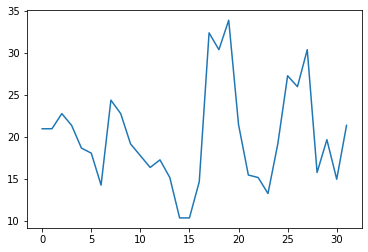

In [ ]:
#check progress of mpg
df.mpg.plot()

<AxesSubplot:xlabel='wt', ylabel='mpg'>

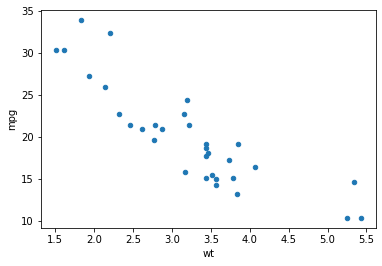

In [ ]:
# check relattion btwn wt and mpg
df.plot(x='wt',y='mpg',kind='scatter')

<AxesSubplot:>

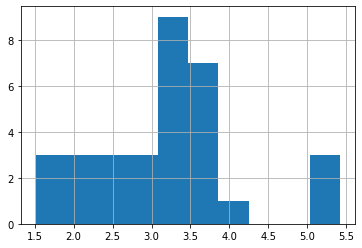

In [ ]:
#check hist plot of wt
df.wt.hist()

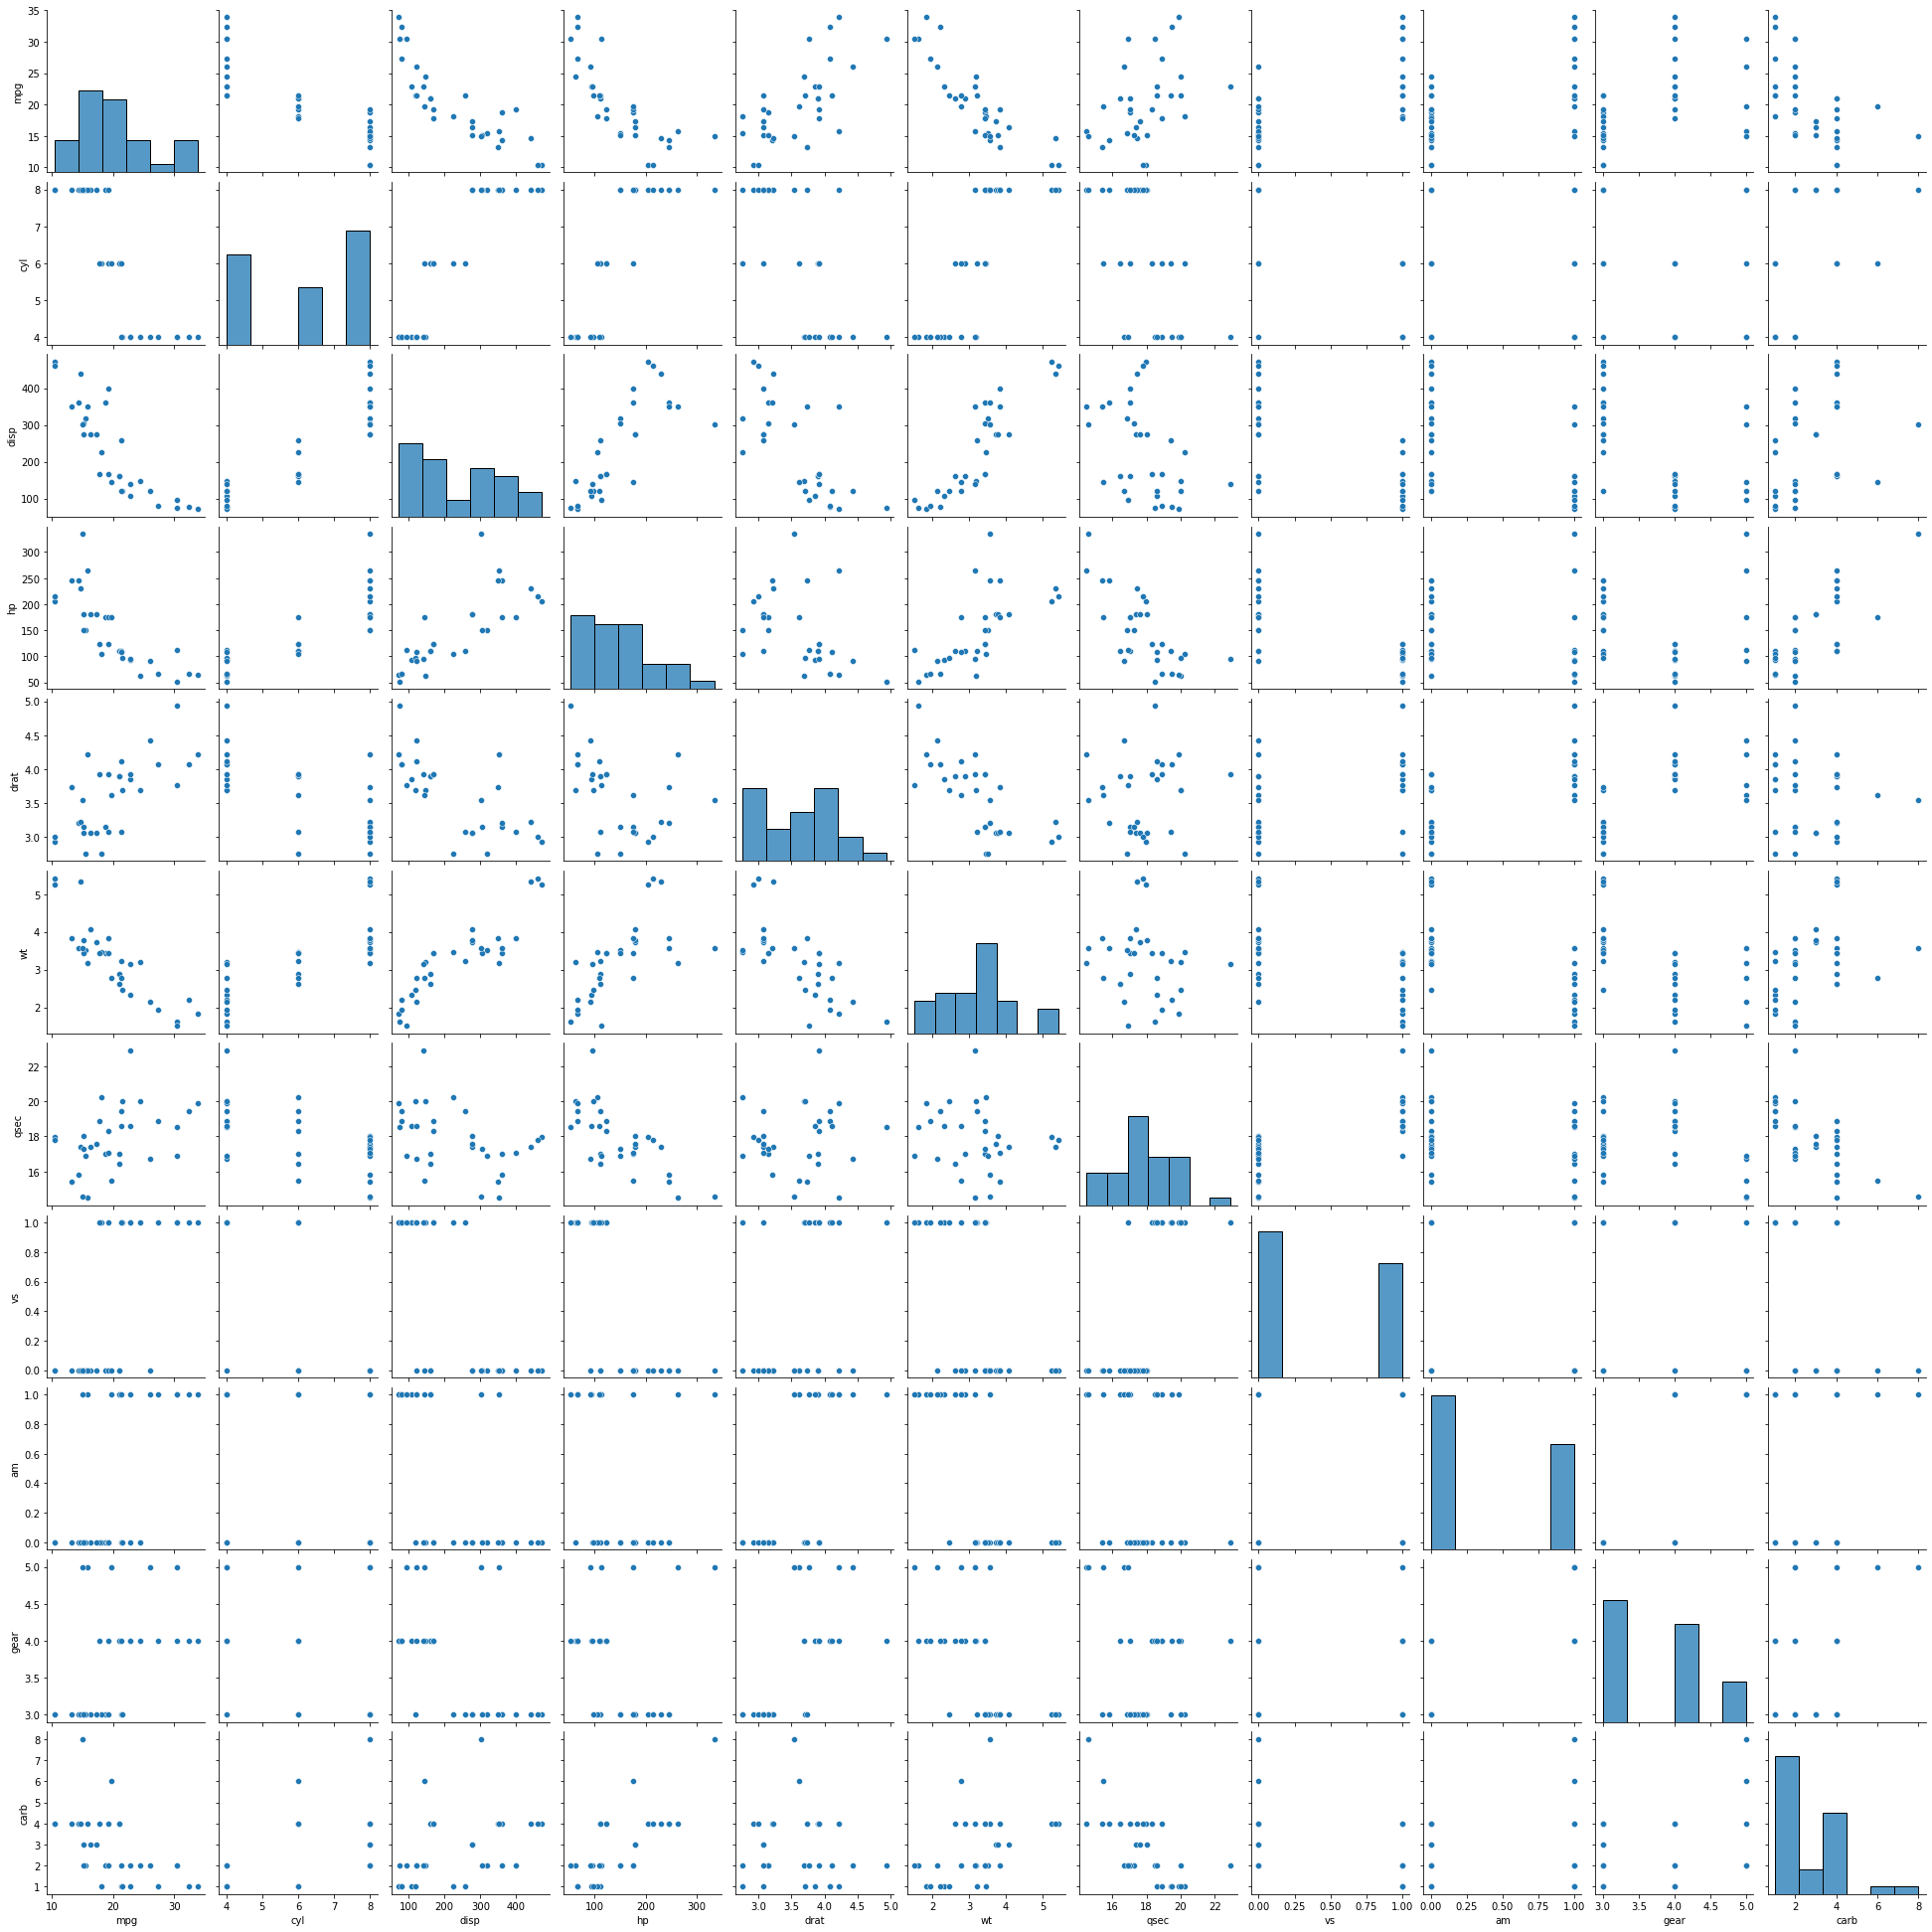

In [ ]:
#check pair to pair relationship
sns.pairplot(df)

In [ ]:
#Select X, y
X = df[['disp','hp','wt']]
X[:3]

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875
2,108.0,93,2.320


In [ ]:
y = df.mpg
y[:3]

0    21.0
1    21.0
2    22.8
Name: mpg, dtype: float64

In [ ]:
#plot disp,hp and wt w.r.t mpg
X.columns

Index(['disp', 'hp', 'wt'], dtype='object')

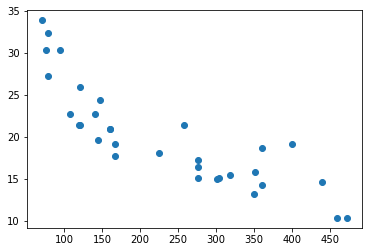

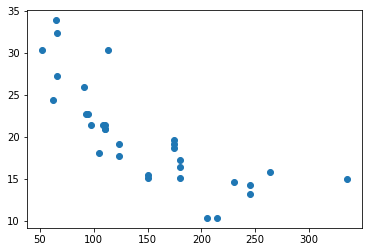

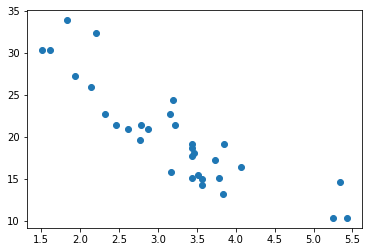

In [ ]:
import matplotlib.pyplot as plt
for col in X.columns:
    plt.scatter(X[col],y)
    plt.show()

#### Assignment: DO the Subplot of all 3 graphs

In [ ]:
# call algorithm and object
from sklearn.linear_model import LinearRegression

In [ ]:
multi = LinearRegression()

## Training

In [ ]:
multi.fit(X,y)

LinearRegression()

## Testing

In [ ]:
X[:2]

,disp,hp,wt
0,160.0,110,2.620
1,160.0,110,2.875


In [ ]:
#supply new test data for disp,hp,wt
multi.predict([[110,120,2.7]])

array([23.0012436])

In [ ]:
multi.predict([[110,70,2.7]])

array([24.55907114])

In [ ]:
#lets reduce wt
multi.predict([[110,70,0.7]])

array([32.1608523])

In [ ]:
# chang disp value
multi.predict([[140,70,0.7]])

array([32.13274203])

In [ ]:
# Check score of training data
multi.score(X,y)*100

82.68361424946447

### y_pred = m1X1 + m2X2 + m3X3 + c

In [ ]:
#slope m
m1,m2,m3 = multi.coef_
display(m1,m2,m3)

-0.0009370090814896698

-0.03115655082994552

-3.800890582637613

In [ ]:
c = multi.intercept_
c

37.10550526903182

In [ ]:
multi.predict([[110,80,1.5]])

array([28.80857433])

In [ ]:
m1*110 + m2*80 + m3*1.5 + c

28.8085743297159

In [ ]:
test = X.sample(12)
test

,disp,hp,wt
26,120.3,91,2.140
17,78.7,66,2.200
12,275.8,180,3.730
10,167.6,123,3.440
25,79.0,66,1.935
16,440.0,230,5.345
13,275.8,180,3.780
6,360.0,245,3.570
24,400.0,175,3.845
19,71.1,65,1.835


In [ ]:
#prediction for 12 sample above
pred = multi.predict(test)
pred

array([26.0236311 , 26.61347102, 17.06157714, 20.04114319, 27.62042592,
        9.21145442, 16.87153261, 15.56564767, 16.66388095, 28.0390739 ,
       19.09111273, 20.98877564])

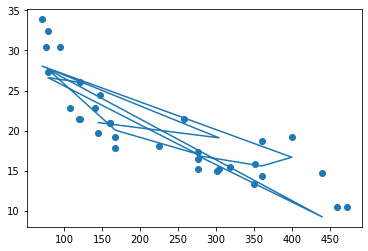

In [ ]:
plt.scatter(X['disp'],y) #actual Data
plt.plot(test['disp'],pred)

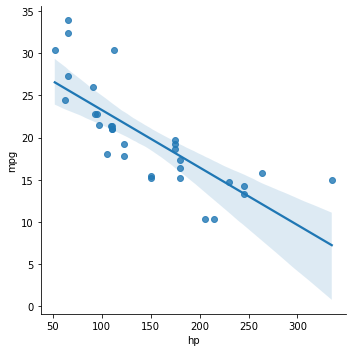

In [ ]:
sns.lmplot(x='hp',y='mpg',data=df)